# pdf から文字抽出

In [1]:
import base64
from pdf2image import convert_from_path, convert_from_bytes


images = convert_from_path('sample_apply.pdf')

for index, image in enumerate(images):
    name = str(index) + '.png'
    image.save(name, 'png')

    

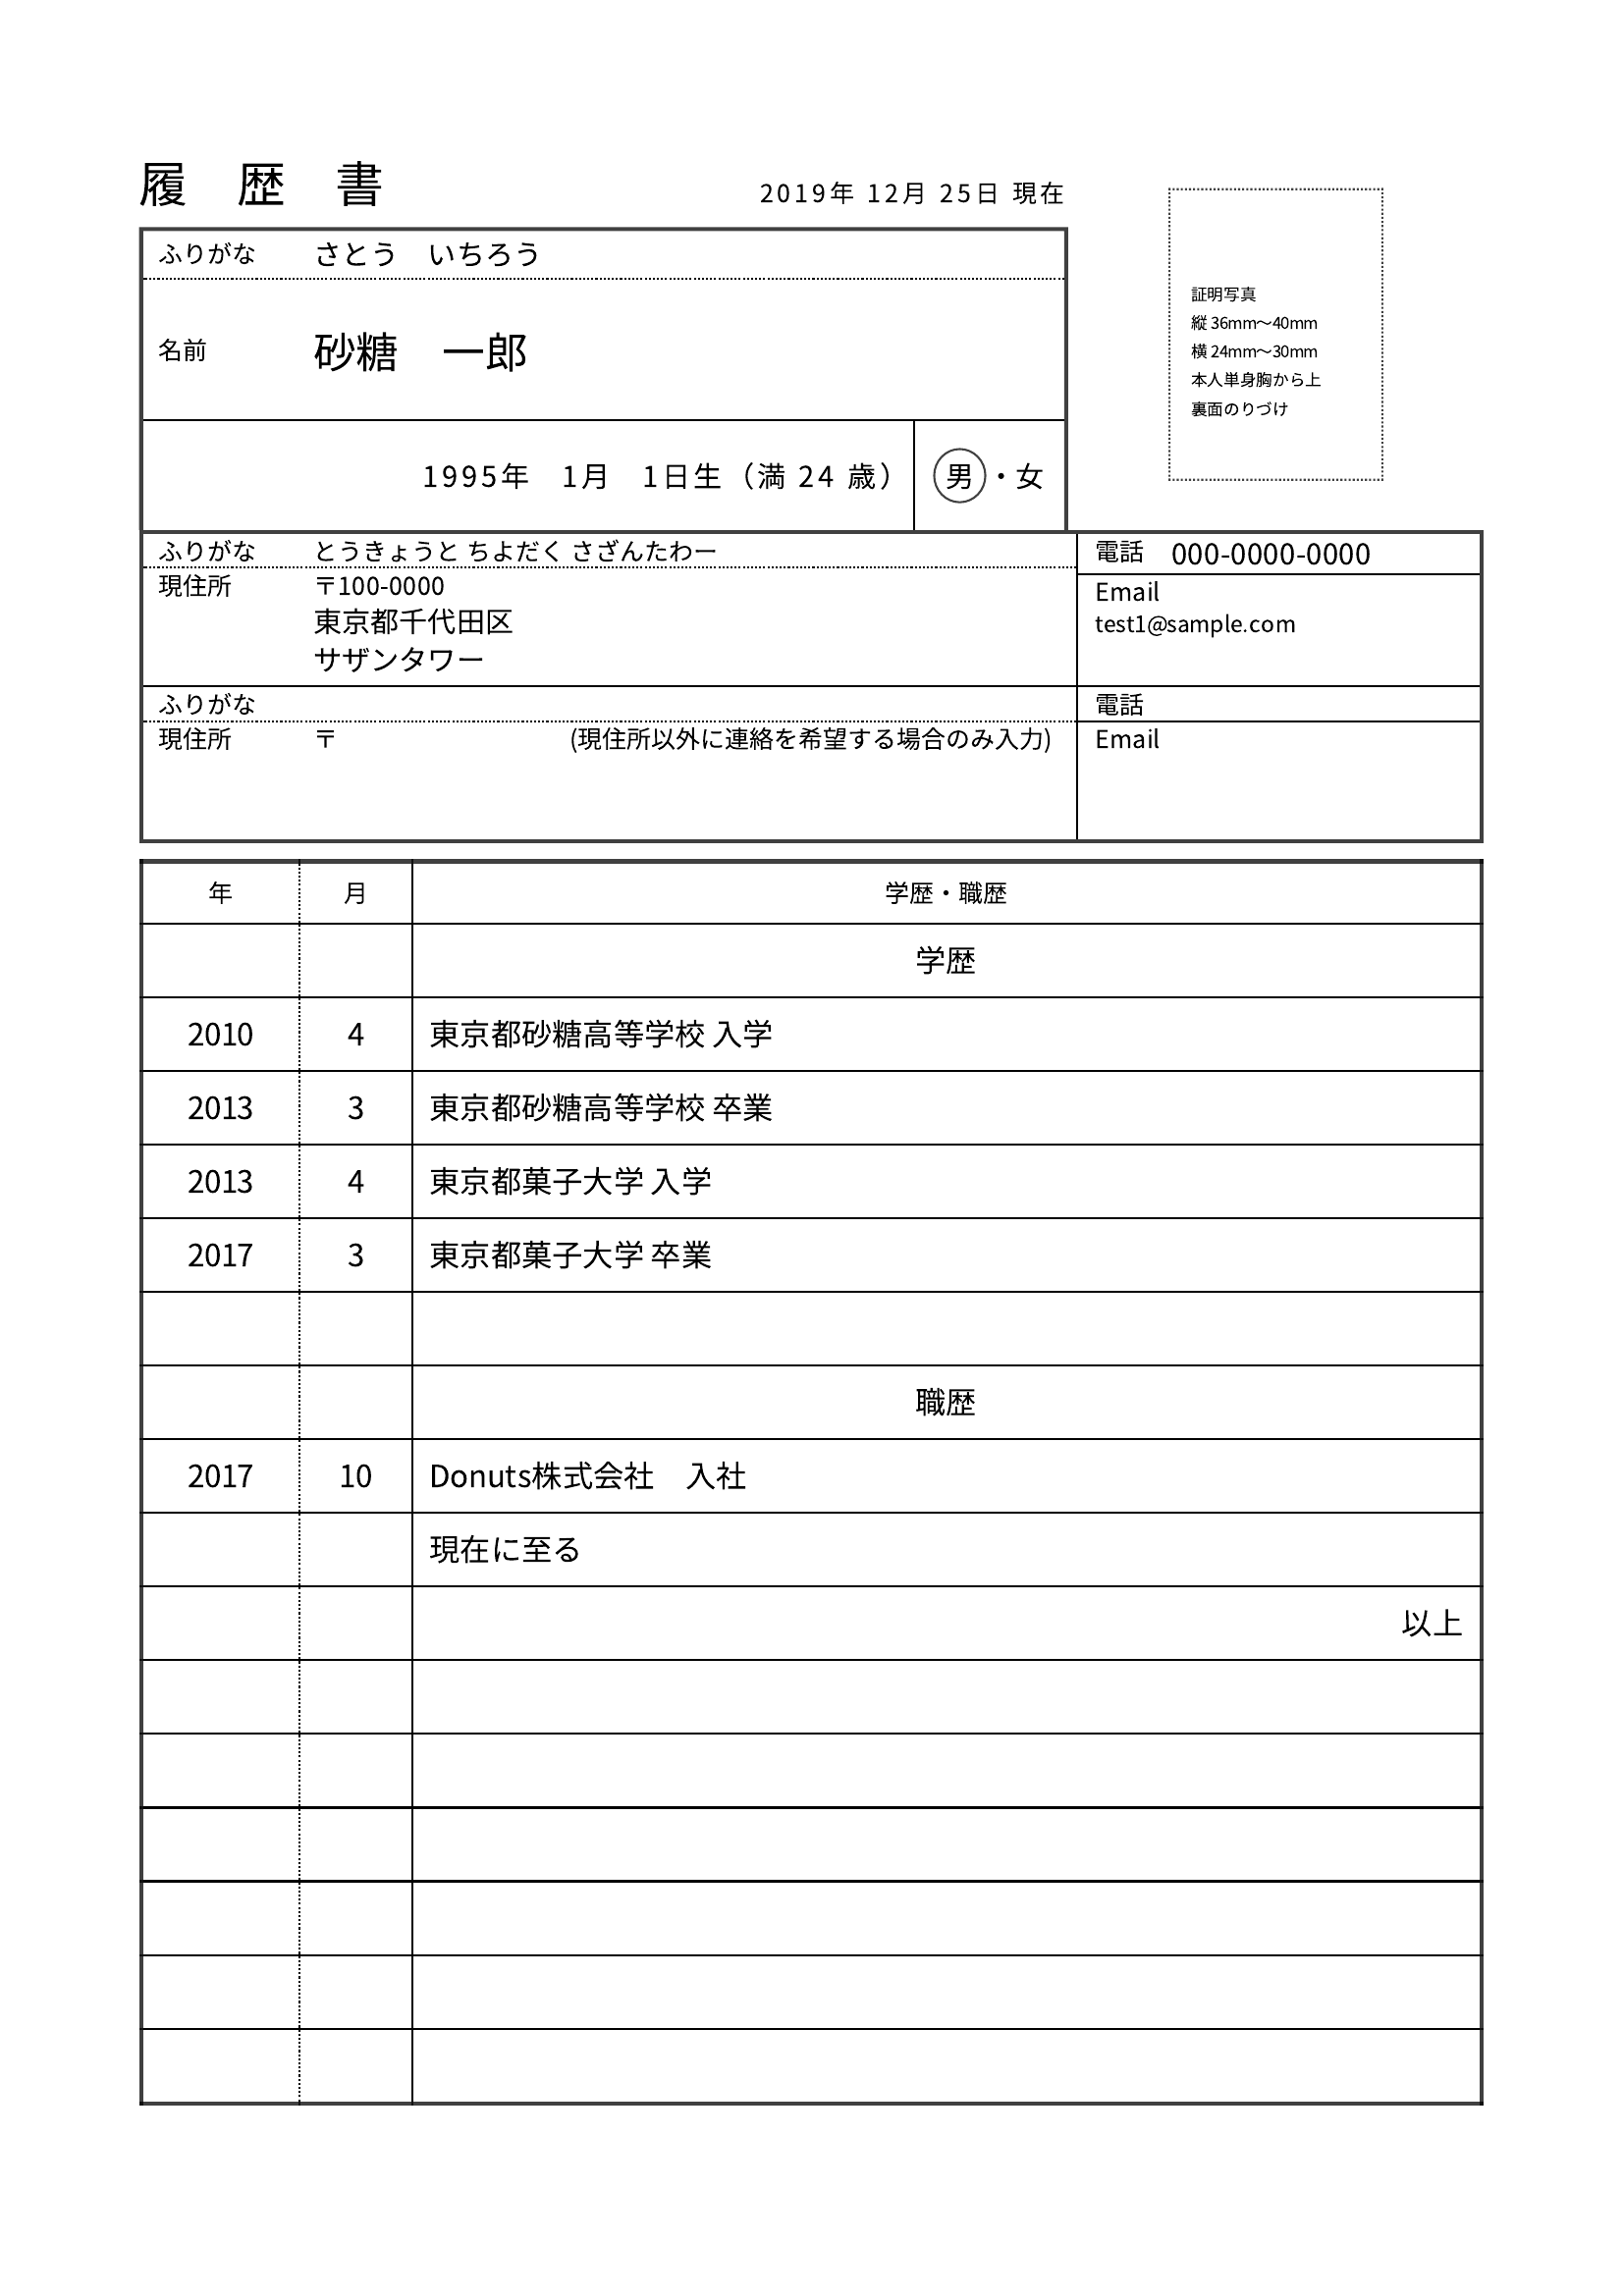

In [2]:
from IPython.display import Image
Image("./0.png")

- 形態素解析 + 位置情報 > 必要な情報空間を

## pdf miner 実験（位置情報をえる）

In [34]:
file_list

['rm/candidate_file_file_631959_履歴書.pdf',
 'rm/candidate_file_file_631373__履歴書.pdf',
 'rm/candidate_file_file_631735__履歴書.pdf',
 'rm/candidate_file_file_631805_2.pdf',
 'rm/candidate_file_file_631810_2.pdf',
 'rm/candidate_file_file_631814_2.pdf',
 'rm/candidate_file_file_631823_2.pdf',
 'rm/candidate_file_file_631833_2.pdf',
 'rm/candidate_file_file_631895_2.pdf',
 'rm/candidate_file_file_632044.pdf']

In [37]:
import io
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.pdfpage import PDFPage
from pdfminer.layout import LAParams

resourceManager = PDFResourceManager()
# 引数にLAParamsを追加
device = PDFPageAggregator(resourceManager, laparams=LAParams())

with open(file_list[0], 'rb') as fp:
    interpreter = PDFPageInterpreter(resourceManager, device)
    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        layout = device.get_result()
        for lt in layout:
            print('{}, x0={:.2f}, x1={:.2f}, y0={:.2f}, y1={:.2f}, width={:.2f}, height={:.2f}'.format(
                    lt.get_text().strip(), lt.x0, lt.x1, lt.y0, lt.y1, lt.width, lt.height))
device.close()

履　歴　書, x0=103.22, x1=151.91, y0=509.76, y1=520.95, width=48.69, height=11.19
フリガナ, x0=103.22, x1=120.28, y0=491.46, y1=496.43, width=17.06, height=4.97
氏　名, x0=103.22, x1=119.87, y0=481.39, y1=487.61, width=16.65, height=6.22
令和　　2　年　　3　月　　3　日現在, x0=266.01, x1=357.54, y0=500.15, y1=508.45, width=91.53, height=8.31
印, x0=344.08, x1=349.08, y0=491.46, y1=496.43, width=5.00, height=4.97
イシハラ　サチコ, x0=214.28, x1=252.49, y0=490.06, y1=495.66, width=38.21, height=5.60
石原 幸子, x0=201.78, x1=265.51, y0=468.01, y1=487.69, width=63.73, height=19.68
生年月日 昭和　　61年　　　5月　　　9日生　（満　33　歳）
フリガナ
現住所, x0=103.22, x1=258.19, y0=440.05, y1=464.25, width=154.97, height=24.20
〒（　335－　0026）
埼玉県戸田市新曽南 3丁目6-1シティテラス戸田公園 302, x0=135.43, x1=313.97, y0=429.51, y1=447.18, width=178.53, height=17.67
※, x0=304.66, x1=308.41, y0=458.81, y1=462.54, width=3.75, height=3.73
男　・　女, x0=324.37, x1=348.29, y0=456.39, y1=462.61, width=23.92, height=6.22
090-9896-0375, x0=166.20, x1=208.59, y0=419.89, y1=428.19, width=42.39, height=

AttributeError: 'LTCurve' object has no attribute 'get_text'

In [35]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.pdfpage import PDFPage
from pdfminer.layout import LAParams, LTTextContainer

resourceManager = PDFResourceManager()
device = PDFPageAggregator(resourceManager, laparams=LAParams())

with open(file_list[0], 'rb') as fp:
    interpreter = PDFPageInterpreter(resourceManager, device)
    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        layout = device.get_result()
        for lt in layout:
            # LTTextContainerの場合だけ標準出力
            if isinstance(lt, LTTextContainer):
                print('{}, x0={:.2f}, x1={:.2f}, y0={:.2f}, y1={:.2f}, width={:.2f}, height={:.2f}'.format(
                        lt.get_text().strip(), lt.x0, lt.x1, lt.y0, lt.y1, lt.width, lt.height))
device.close()

履　歴　書, x0=103.22, x1=151.91, y0=509.76, y1=520.95, width=48.69, height=11.19
フリガナ, x0=103.22, x1=120.28, y0=491.46, y1=496.43, width=17.06, height=4.97
氏　名, x0=103.22, x1=119.87, y0=481.39, y1=487.61, width=16.65, height=6.22
令和　　2　年　　3　月　　3　日現在, x0=266.01, x1=357.54, y0=500.15, y1=508.45, width=91.53, height=8.31
印, x0=344.08, x1=349.08, y0=491.46, y1=496.43, width=5.00, height=4.97
イシハラ　サチコ, x0=214.28, x1=252.49, y0=490.06, y1=495.66, width=38.21, height=5.60
石原 幸子, x0=201.78, x1=265.51, y0=468.01, y1=487.69, width=63.73, height=19.68
生年月日 昭和　　61年　　　5月　　　9日生　（満　33　歳）
フリガナ
現住所, x0=103.22, x1=258.19, y0=440.05, y1=464.25, width=154.97, height=24.20
〒（　335－　0026）
埼玉県戸田市新曽南 3丁目6-1シティテラス戸田公園 302, x0=135.43, x1=313.97, y0=429.51, y1=447.18, width=178.53, height=17.67
※, x0=304.66, x1=308.41, y0=458.81, y1=462.54, width=3.75, height=3.73
男　・　女, x0=324.37, x1=348.29, y0=456.39, y1=462.61, width=23.92, height=6.22
090-9896-0375, x0=166.20, x1=208.59, y0=419.89, y1=428.19, width=42.39, height=

# pdf parser

In [38]:

from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
import re

In [54]:
def get_text(pdfname):
    # PDFファイル名が未指定の場合は、空文字列を返して終了
    if (pdfname == ''):
        return ''
    else:
        # 処理するPDFファイルを開く/開けなければ
        try:
            fp = open(pdfname, 'rb')
        except:
            return ''
        
    # リソースマネージャインスタンス
    rsrcmgr = PDFResourceManager()
    # 出力先インスタンス
    outfp = StringIO()
    # パラメータインスタンス
    laparams = LAParams()
    # 縦書き文字を横並びで出力する
    laparams.detect_vertical = True
    # デバイスの初期化
    device = TextConverter(rsrcmgr, outfp, laparams=laparams)
    # テキスト抽出インタプリタインスタンス
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # 対象ページを読み、テキスト抽出する。（maxpages：0は全ページ）
    for page in PDFPage.get_pages(fp, pagenos=None, maxpages=0, password=None,caching=True, check_extractable=True):
        interpreter.process_page(page)
    #取得したテキストをすべて読みだす
    ret = outfp.getvalue()
    # 後始末をしておく    
    fp.close()
    device.close()
    outfp.close()
    # 空白と改行をとりさり一塊のテキストとして返す
#     ret = re.sub(r"(?<!\r)\n",'',ret)
    ret = re.sub(r"\s",'',ret)
    return ret


file_path = 'rm/candidate_file_file_631959_履歴書.pdf'

result = get_text(file_path)
result

'履歴書フリガナ氏名令和2年3月3日現在印イシハラサチコ石原幸子生年月日昭和61年5月9日生（満33歳）フリガナ現住所〒（335－0026）埼玉県戸田市新曽南3丁目6-1シティテラス戸田公園302※男・女090-9896-0375Emailsachiko375jp@yahoo.co.jp〒（－）（現住所以外に連絡を希望する場合のみ記入）携帯電話フリガナ連絡先TELFAXTELFAX200520052008200920092009201120112012201320183静岡県立静岡城北高等学校卒業4日本福祉大学経済学部経済学科入学9北京清華大学語学留学3日本福祉大学経済学部経済学科卒業6北京清華大学語学留学修了職歴9Oakpacificinteractive,Inc.入社(北京)10Oakpacificinteractive,Inc.一身上の都合により退職11Rekoo,Inc.入社(北京)11Rekoo,Inc.一身上の都合により退職1クルーズ株式会社入社5CROOZSHOPLIST株式会社転籍記入注意1.鉛筆以外の青又は黒の筆記具で記入3.※印のところは○でかこむ2.数字はアラビア数字で、文字は崩さず正確に書く年月学歴・職歴など（項目別にまとめて書く）学歴年月免許・資格20171普通自動車第一種運転免許（AT限定）通勤時間最寄り駅約時間分扶養家族数配偶者配偶者の扶養義務JR埼京線戸田公園駅（配偶者を除く）１人有・無有・無特技・趣味・得意科目等本人希望記入欄（特に給料・職種・勤務時間・勤務地・その他の希望があれば記入）現年収430万円'

In [61]:
def get_text(pdfname):
    # PDFファイル名が未指定の場合は、空文字列を返して終了
    if (pdfname == ''):
        return ''
    else:
        # 処理するPDFファイルを開く/開けなければ
        try:
            fp = open(pdfname, 'rb')
        except:
            return ''
        
    # リソースマネージャインスタンス
    rsrcmgr = PDFResourceManager()
    # 出力先インスタンス
    outfp = StringIO()
    # パラメータインスタンス
    laparams = LAParams()
    # 縦書き文字を横並びで出力する
    laparams.detect_vertical = True
    # デバイスの初期化

    laparams = LAParams(word_margin=10, line_margin=0.1, char_margin=10)

    device = TextConverter(rsrcmgr, outfp, laparams=laparams)
    # テキスト抽出インタプリタインスタンス
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # 対象ページを読み、テキスト抽出する。（maxpages：0は全ページ）
    for page in PDFPage.get_pages(fp, pagenos=None, maxpages=0, password=None,caching=True, check_extractable=True):
        interpreter.process_page(page)
    #取得したテキストをすべて読みだす
    ret = outfp.getvalue()
    # 後始末をしておく    
    fp.close()
    device.close()
    outfp.close()
    # 空白と改行をとりさり一塊のテキストとして返す
#     ret = re.sub(r"(?<!\r)\n",'',ret)
    ret = re.sub(r"\s",'',ret)
    return ret


file_path = 'rm/candidate_file_file_631959_履歴書.pdf'

result = get_text(file_path)
result

'履歴書フリガナ氏名フリガナ現住所〒（335－0026）フリガナ連絡先〒（－）令和2年3月3日現在印イシハラサチコ石原幸子生年月日昭和61年5月9日生（満33歳）※男・女埼玉県戸田市新曽南3丁目6-1シティテラス戸田公園302FAX携帯電話090-9896-0375Emailsachiko375jp@yahoo.co.jp（現住所以外に連絡を希望する場合のみ記入）TELTELFAX20053静岡県立静岡城北高等学校卒業20054日本福祉大学経済学部経済学科入学20089北京清華大学語学留学20093日本福祉大学経済学部経済学科卒業20096北京清華大学語学留学修了20099Oakpacificinteractive,Inc.入社(北京)201110Oakpacificinteractive,Inc.一身上の都合により退職201111Rekoo,Inc.入社(北京)201211Rekoo,Inc.一身上の都合により退職20131クルーズ株式会社入社20185CROOZSHOPLIST株式会社転籍記入注意1.鉛筆以外の青又は黒の筆記具で記入2.数字はアラビア数字で、文字は崩さず正確に書く3.※印のところは○でかこむ年月学歴・職歴など（項目別にまとめて書く）学歴年月免許・資格20171普通自動車第一種運転免許（AT限定）職歴通勤時間約時間分扶養家族数配偶者配偶者の扶養義務最寄り駅JR埼京線戸田公園駅（配偶者を除く）１人有・無有・無特技・趣味・得意科目等本人希望記入欄（特に給料・職種・勤務時間・勤務地・その他の希望があれば記入）現年収430万円'

'履歴書フリガナ氏名令和2年3月3日現在印イシハラサチコ石原幸子生年月日昭和61年5月9日生（満33歳）フリガナ現住所〒（335－0026）埼玉県戸田市新曽南3丁目6-1シティテラス戸田公園302※男・女090-9896-0375Emailsachiko375jp@yahoo.co.jp〒（－）（現住所以外に連絡を希望する場合のみ記入）携帯電話フリガナ連絡先TELFAXTELFAX200520052008200920092009201120112012201320183静岡県立静岡城北高等学校卒業4日本福祉大学経済学部経済学科入学9北京清華大学語学留学3日本福祉大学経済学部経済学科卒業6北京清華大学語学留学修了職歴9Oakpacificinteractive,Inc.入社(北京)10Oakpacificinteractive,Inc.一身上の都合により退職11Rekoo,Inc.入社(北京)11Rekoo,Inc.一身上の都合により退職1クルーズ株式会社入社5CROOZSHOPLIST株式会社転籍記入注意1.鉛筆以外の青又は黒の筆記具で記入3.※印のところは○でかこむ2.数字はアラビア数字で、文字は崩さず正確に書く年月学歴・職歴など（項目別にまとめて書く）学歴年月免許・資格20171普通自動車第一種運転免許（AT限定）通勤時間最寄り駅約時間分扶養家族数配偶者配偶者の扶養義務JR埼京線戸田公園駅（配偶者を除く）１人有・無有・無特技・趣味・得意科目等本人希望記入欄（特に給料・職種・勤務時間・勤務地・その他の希望があれば記入）現年収430万円'

## 全てのpdfで確認

In [43]:
file_list = [
'rm/candidate_file_file_631959_履歴書.pdf', 
'rm/candidate_file_file_631373__履歴書.pdf', 
'rm/candidate_file_file_631735__履歴書.pdf', 
'rm/candidate_file_file_631805_2.pdf', 
'rm/candidate_file_file_631810_2.pdf', 
'rm/candidate_file_file_631814_2.pdf', 
'rm/candidate_file_file_631823_2.pdf', 
'rm/candidate_file_file_631833_2.pdf', 
'rm/candidate_file_file_631895_2.pdf', 
'rm/candidate_file_file_632044.pdf']

In [44]:
import base64
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import Image


def toimage(file_path):
    images = convert_from_path(file_path)

    for index, image in enumerate(images):
        name = str(index) + '.png'
        image.save(name, 'png')

    

    return Image("./0.png")

In [45]:
image_list = [toimage(file) for file in file_list]    

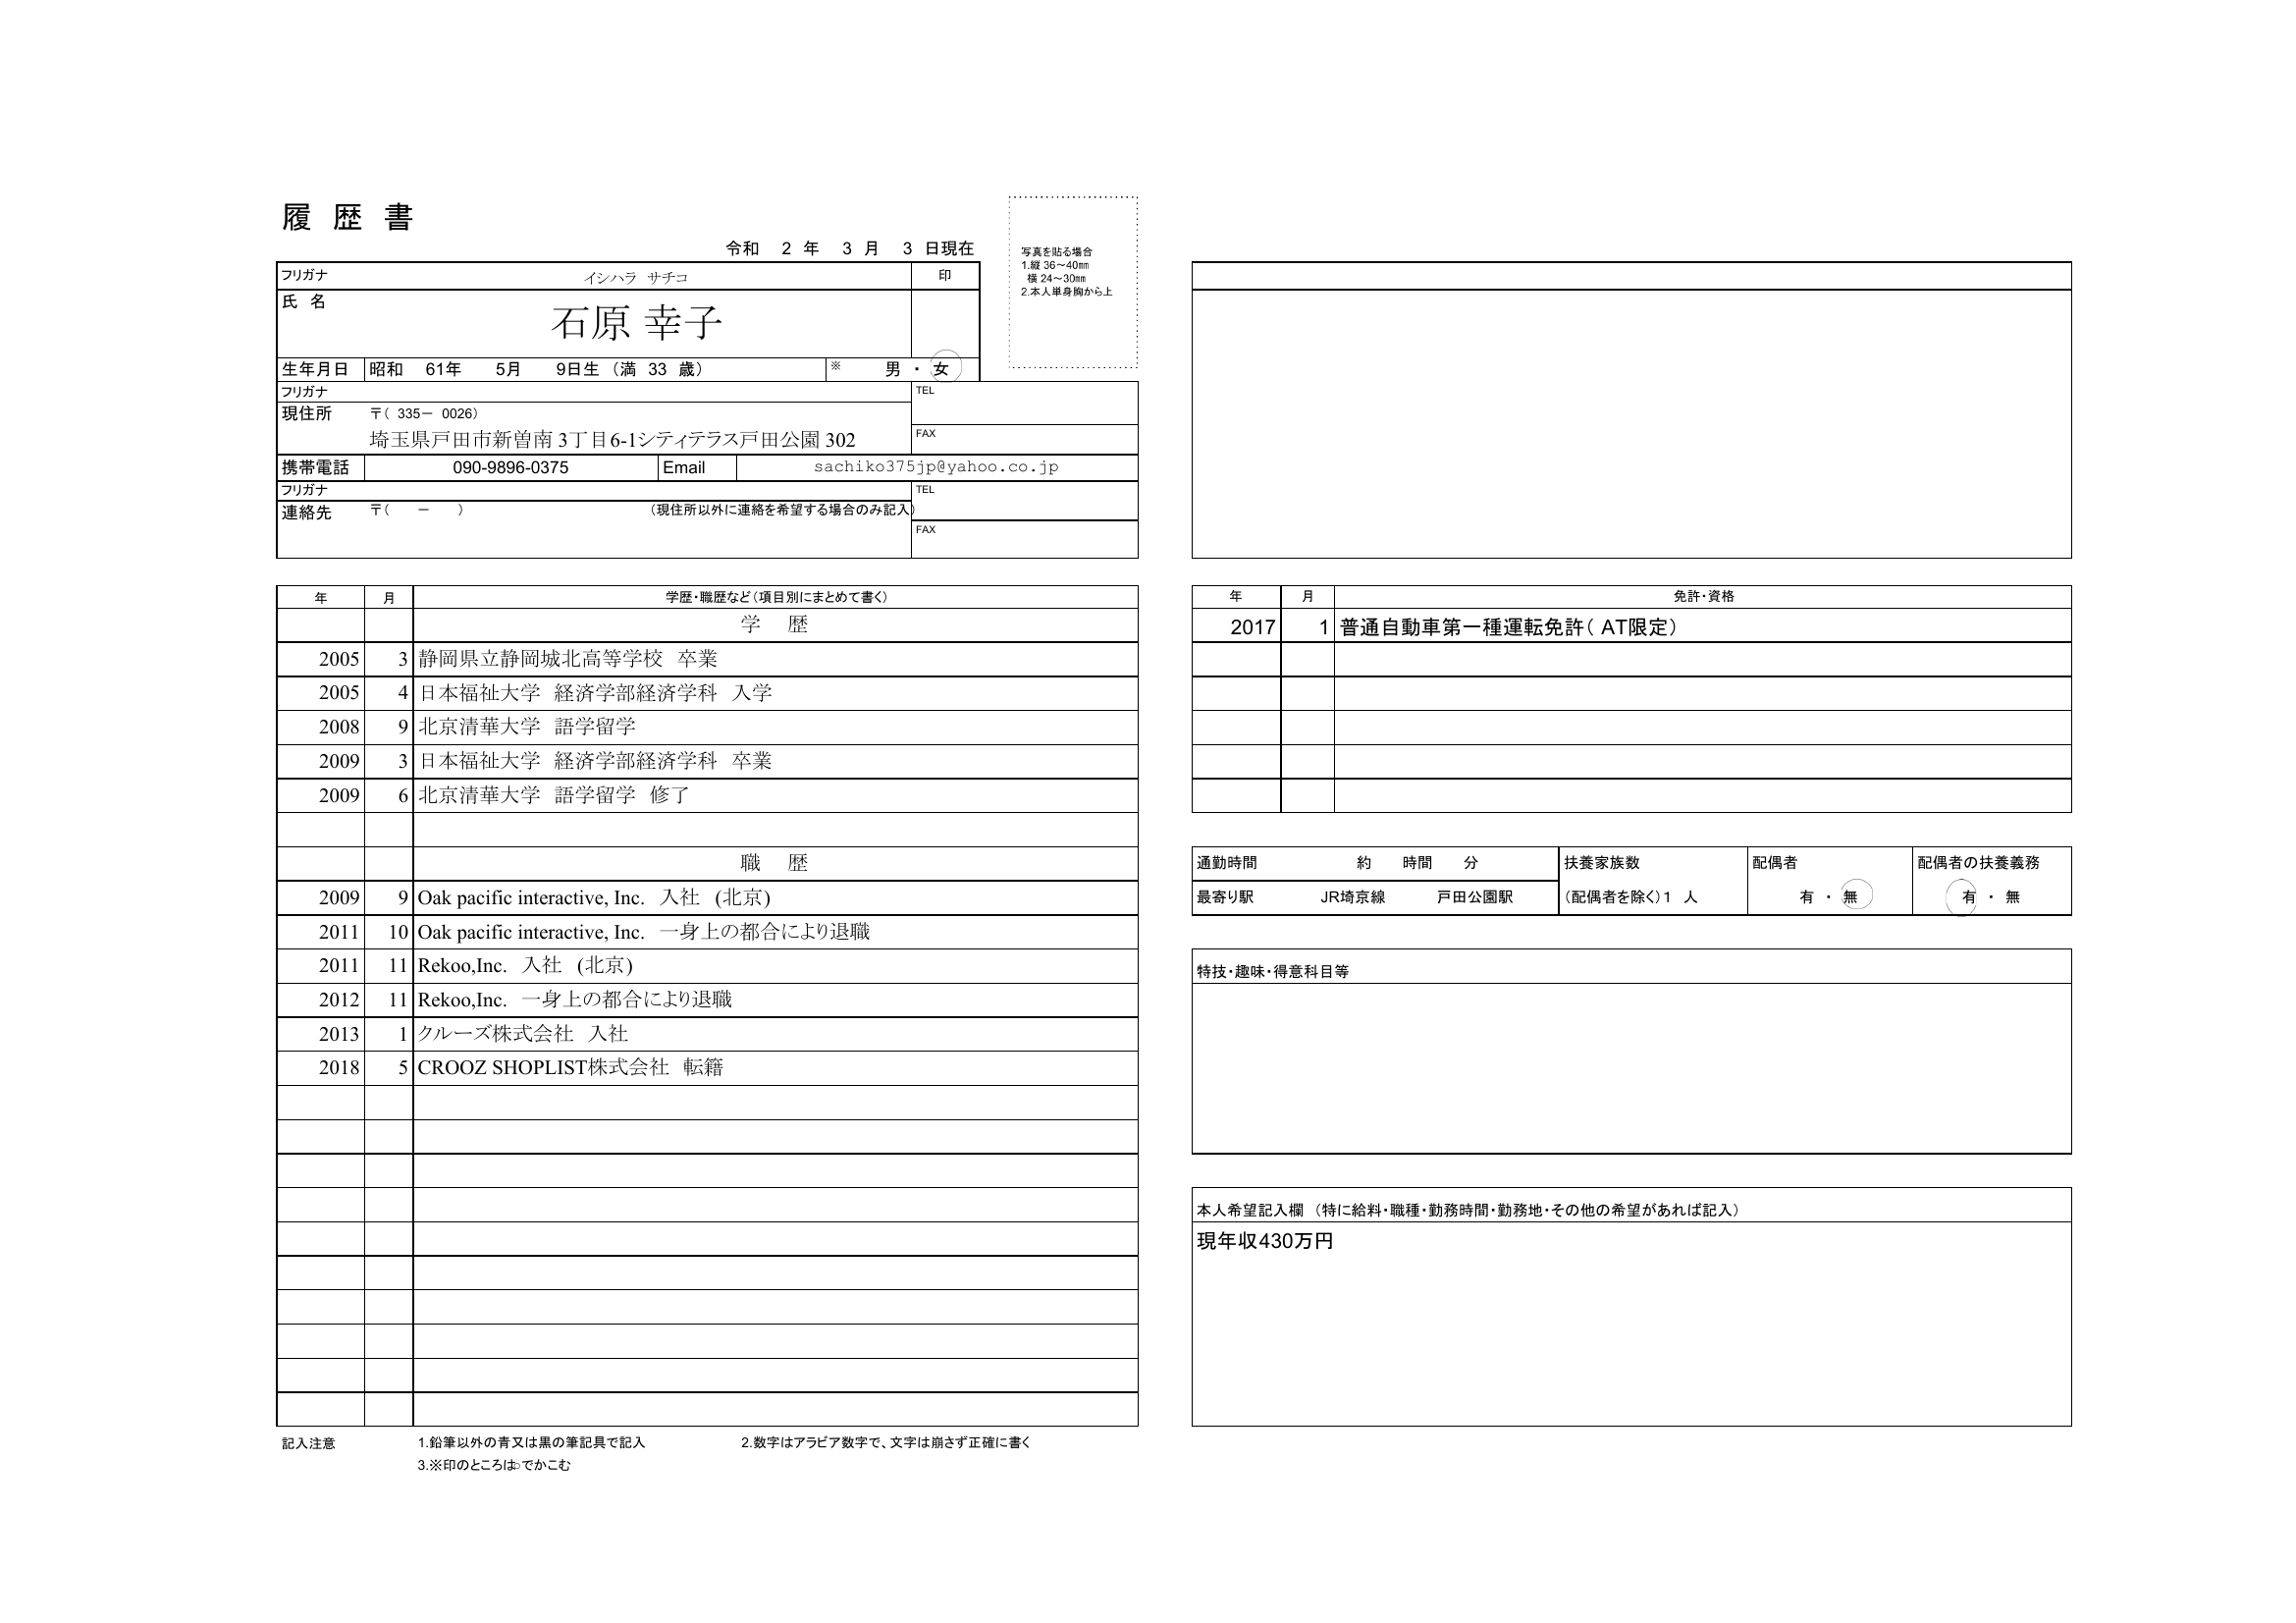

In [46]:
image_list[0]

In [47]:

text_list = [get_text(file) for file in file_list]

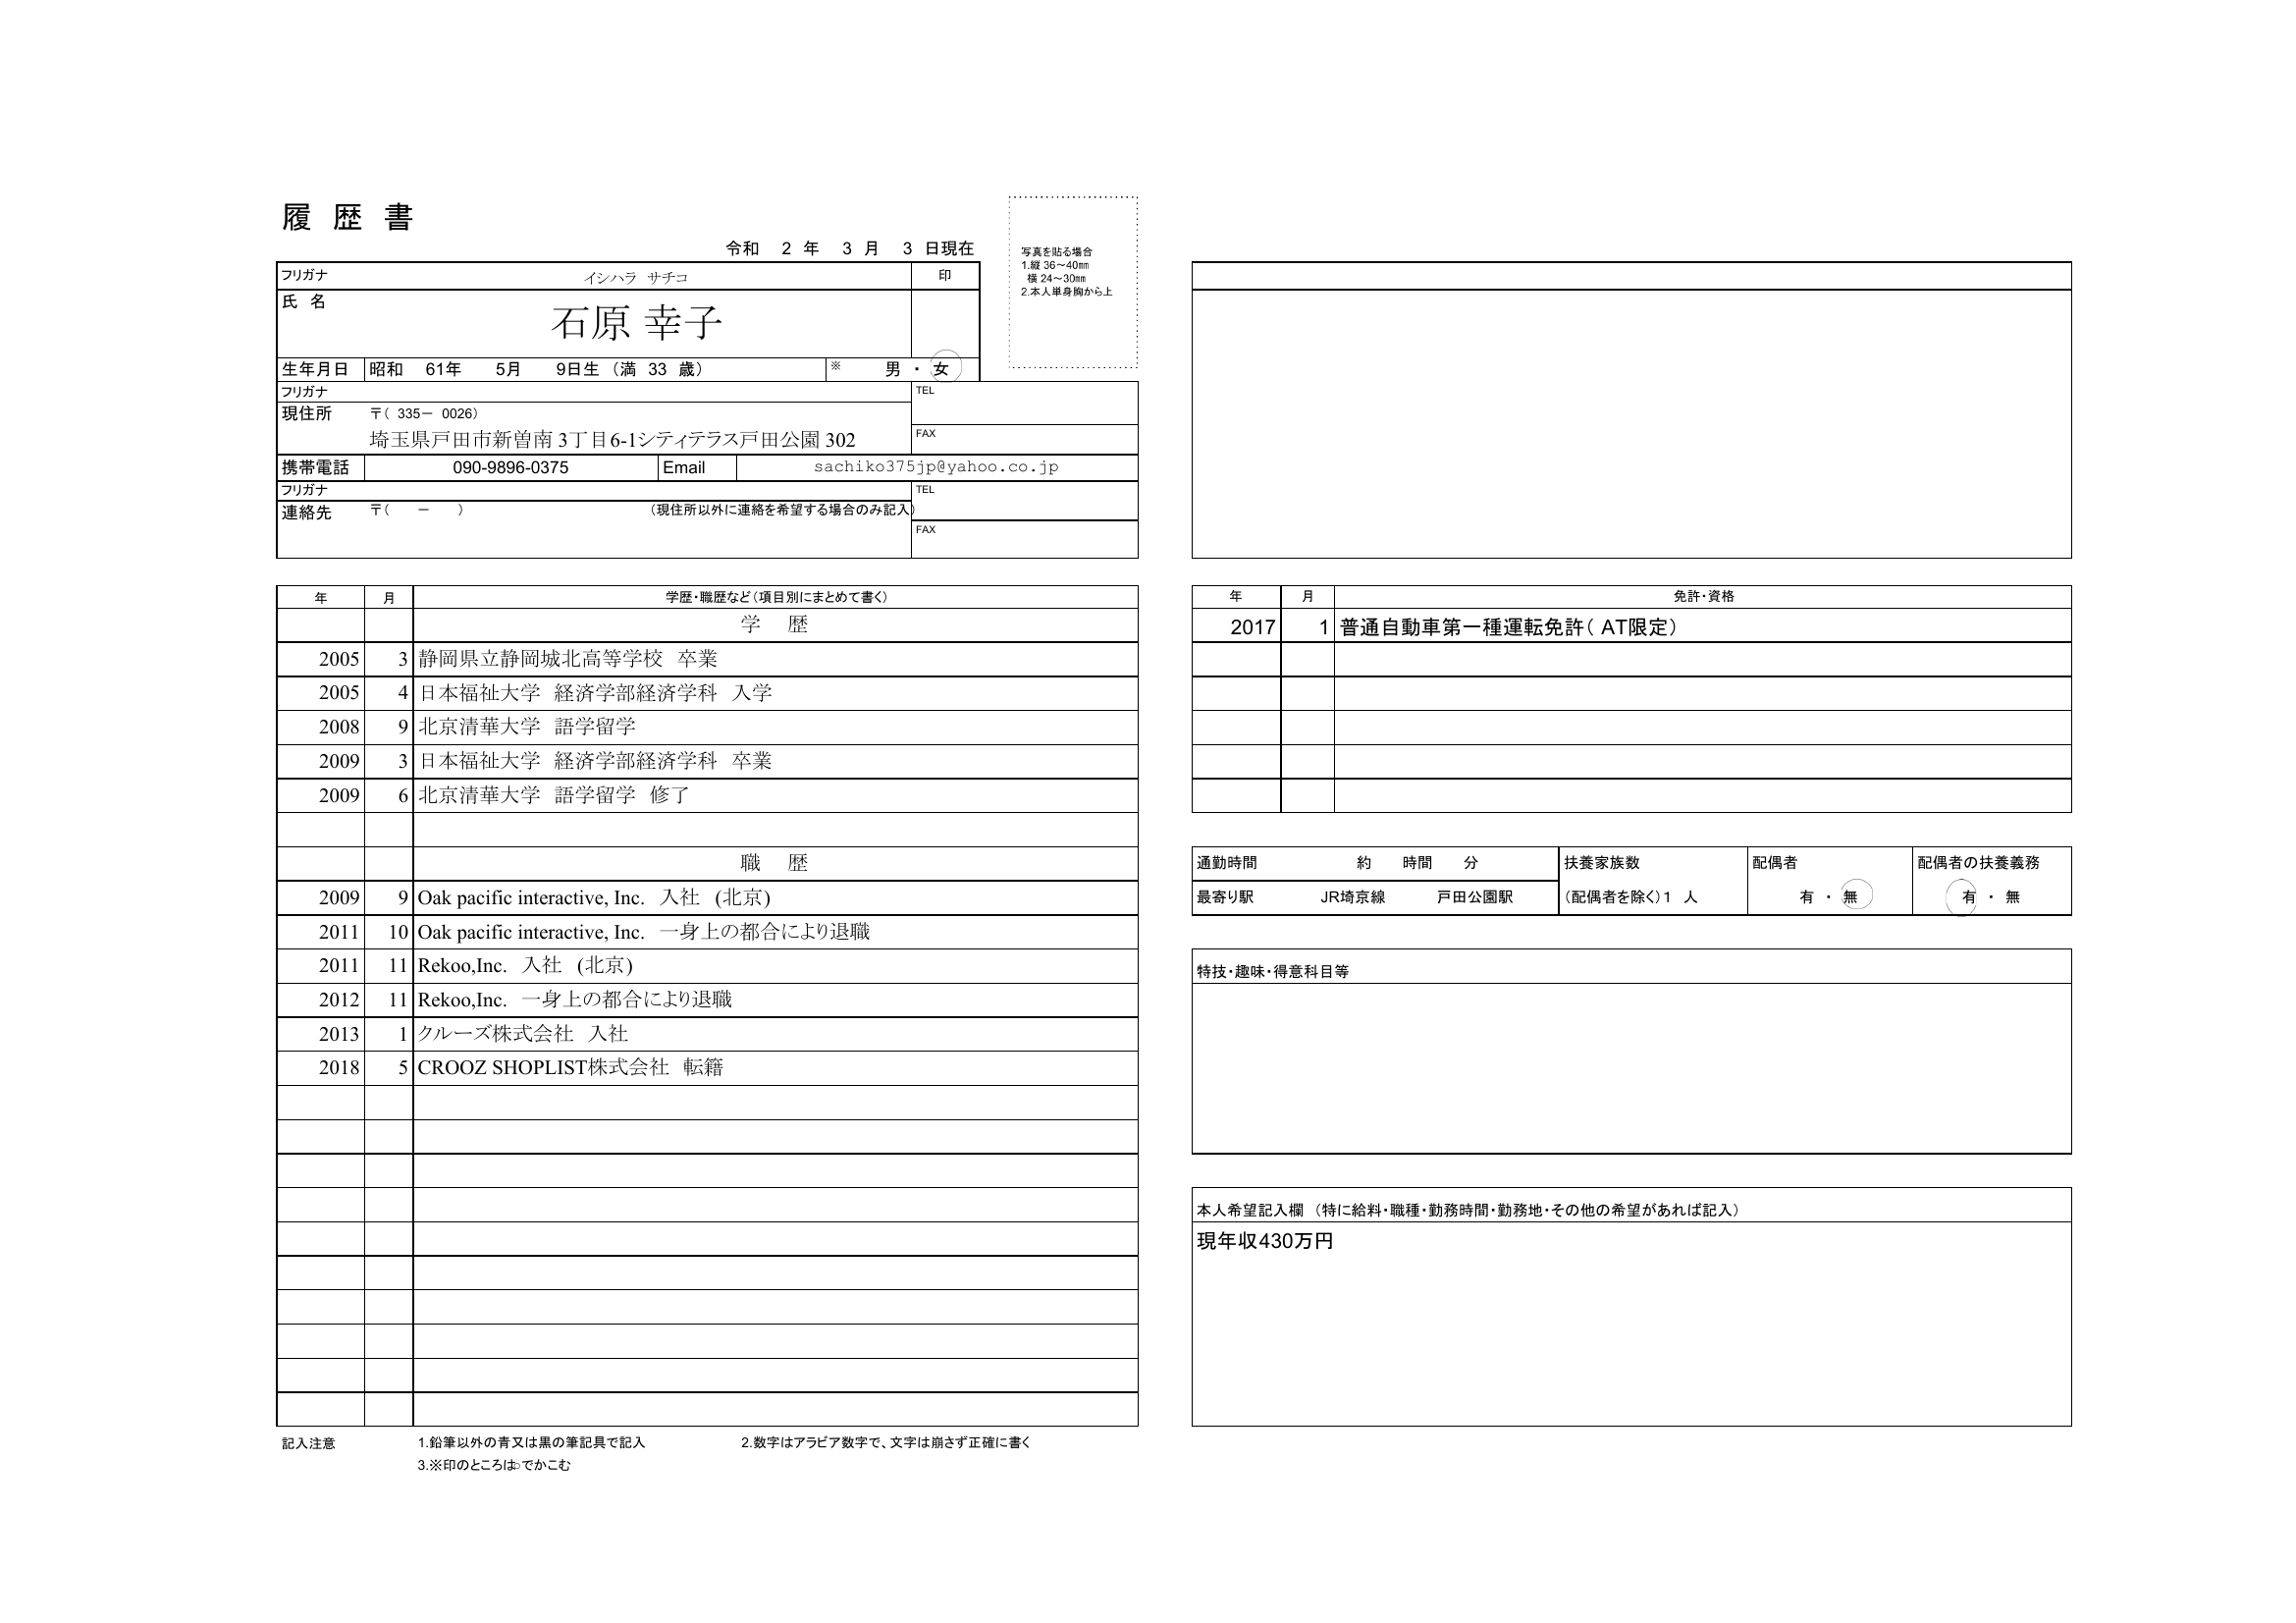

In [48]:
image_list[0]

In [49]:
text_list[0]

'履歴書フリガナ氏名令和2年3月3日現在印イシハラサチコ石原幸子生年月日昭和61年5月9日生（満33歳）フリガナ現住所〒（335－0026）埼玉県戸田市新曽南3丁目6-1シティテラス戸田公園302※男・女090-9896-0375Emailsachiko375jp@yahoo.co.jp〒（－）（現住所以外に連絡を希望する場合のみ記入）携帯電話フリガナ連絡先TELFAXTELFAX200520052008200920092009201120112012201320183静岡県立静岡城北高等学校卒業4日本福祉大学経済学部経済学科入学9北京清華大学語学留学3日本福祉大学経済学部経済学科卒業6北京清華大学語学留学修了職歴9Oakpacificinteractive,Inc.入社(北京)10Oakpacificinteractive,Inc.一身上の都合により退職11Rekoo,Inc.入社(北京)11Rekoo,Inc.一身上の都合により退職1クルーズ株式会社入社5CROOZSHOPLIST株式会社転籍記入注意1.鉛筆以外の青又は黒の筆記具で記入3.※印のところは○でかこむ2.数字はアラビア数字で、文字は崩さず正確に書く年月学歴・職歴など（項目別にまとめて書く）学歴年月免許・資格20171普通自動車第一種運転免許（AT限定）通勤時間最寄り駅約時間分扶養家族数配偶者配偶者の扶養義務JR埼京線戸田公園駅（配偶者を除く）１人有・無有・無特技・趣味・得意科目等本人希望記入欄（特に給料・職種・勤務時間・勤務地・その他の希望があれば記入）現年収430万円'

## camelot を利用

In [37]:
!pip install camelot-py[cv]

     |████████████████████████████████| 42 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 5.4 MB/s eta 0:00:011
     |████████████████████████████████| 172 kB 6.3 MB/s eta 0:00:01
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61084 sha256=fa24cec7f4d53f79862236cb8e7307f3dfbc33336e0a7c55daf5d59cef737516
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhfvcaku/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
  Created wheel for openpyxl: filename=openpyxl-3.0.3-py2.py3-none-any.whl size=241262 sha256=6f3d5a51e549c0e7273f27bd6995f48ff15e1f67bda647daca042e028eb2cca4
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhfvcaku/wheels/5b/c0/e7/e16d3916984addf40bd021fa98d1624cb24a9adc48da4e62b5
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8915 sha256=76fa7b7a50e2f5079c119fceea058fdda5f5efe415ca9becbae7931b28479a07
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhfvcaku/wheels/e2/bd/55/048

In [19]:
import camelot
file_path = file_list[0]
tables = camelot.read_pdf(file_path)

print(tables)
tables.export('foo.csv', f='csv', compress=True) # json, excel, html
tables[0]


<TableList n=6>


<Table shape=(2, 1)>

In [ ]:
tables[0].parsing_report
{
    'accuracy': 99.02,
    'whitespace': 12.24,
    'order': 1,
    'page': 1
}
tables[0].to_csv('foo.csv') # to_json, to_excel, to_html
tables[0].df # get a pandas DataFrame!

## tika

In [20]:
!pip install tika

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32884 sha256=6cc60633a42ada41b584b40b3bb5e8326c0cf6ed0d64648593ec58d062dc505e
  Stored in directory: /tmp/pip-ephem-wheel-cache-mv5vvtlv/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [23]:
from tika import parser

pdf = parser.from_file(file_list[0])

print(pdf["content"])

2020-03-25 07:14:38,778 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2020-03-25 07:14:40,401 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2020-03-25 07:17:05,310 [MainThread  ] [ERROR]  Unable to run java; is it installed?
2020-03-25 07:17:05,312 [MainThread  ] [ERROR]  Failed to receive startup confirmation from startServer.


RuntimeError: Unable to start Tika server.

# 自然言語処理

## 前処理


In [27]:
import MeCab

In [29]:
tagger = MeCab.Tagger()
print(tagger.parse(result))

履歴	名詞,一般,*,*,*,*,履歴,リレキ,リレキ
書	名詞,接尾,一般,*,*,*,書,ショ,ショ
2019	名詞,数,*,*,*,*,*
年	名詞,接尾,助数詞,*,*,*,年,ネン,ネン
12	名詞,数,*,*,*,*,*
月	名詞,一般,*,*,*,*,月,ツキ,ツキ
25	名詞,数,*,*,*,*,*
日	名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ
現在	名詞,副詞可能,*,*,*,*,現在,ゲンザイ,ゲンザイ
ふりがな	名詞,一般,*,*,*,*,ふりがな,フリガナ,フリガナ
さとう	形容詞,自立,*,*,形容詞・アウオ段,連用ゴザイ接続,さとい,サトウ,サトー
いちろう	名詞,固有名詞,人名,名,*,*,いちろう,イチロウ,イチロー
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
砂糖	名詞,一般,*,*,*,*,砂糖,サトウ,サトー
一	名詞,数,*,*,*,*,一,イチ,イチ
郎	名詞,一般,*,*,*,*,郎,ロウ,ロー
1995	名詞,数,*,*,*,*,*
年	名詞,接尾,助数詞,*,*,*,年,ネン,ネン
1	名詞,数,*,*,*,*,*
月	名詞,一般,*,*,*,*,月,ツキ,ツキ
1	名詞,数,*,*,*,*,*
日	名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ
生	名詞,接尾,一般,*,*,*,生,セイ,セイ
（	記号,括弧開,*,*,*,*,（,（,（
満	接頭詞,数接続,*,*,*,*,満,マン,マン
24	名詞,数,*,*,*,*,*
歳	名詞,接尾,助数詞,*,*,*,歳,サイ,サイ
）	記号,括弧閉,*,*,*,*,）,）,）
男	名詞,一般,*,*,*,*,男,オトコ,オトコ
・	記号,一般,*,*,*,*,・,・,・
女	名詞,一般,*,*,*,*,女,オンナ,オンナ
ふりがな	名詞,一般,*,*,*,*,ふりがな,フリガナ,フリガナ
とうき	名詞,一般,*,*,*,*,とうき,トウキ,トーキ
ょうとちよだくさざんたわ	名詞,一般,*,*,*,*,*
ー	名詞,一般,*,*,*,*,*
電話	名詞,サ変接続,*,*,*,*,電話,デンワ,デンワ
000	名詞,数,*,*,*,*,*
-	名詞,サ変接続,*,*,*,*,*
0000	名詞,数,*,*,*,*,*
-	名詞,サ変接続,*,*,*,*,*


In [30]:
def tokenize(text):
    node = tagger.parseToNode(text)
    tokens = []
    while node:
        if node.surface != '':
            tokens.append(node.surface)
        node = node.next
    return tokens

In [32]:
tokenize(result)

['履歴',
 '書',
 '2019',
 '年',
 '12',
 '月',
 '25',
 '日',
 '現在',
 'ふりがな',
 'さとう',
 'いちろう',
 '名前',
 '砂糖',
 '一',
 '郎',
 '1995',
 '年',
 '1',
 '月',
 '1',
 '日',
 '生',
 '（',
 '満',
 '24',
 '歳',
 '）',
 '男',
 '・',
 '女',
 'ふりがな',
 'とうき',
 'ょうとちよだくさざんたわ',
 'ー',
 '電話',
 '000',
 '-',
 '0000',
 '-',
 '0000',
 'Emailtest',
 '1',
 '@',
 'sample',
 '.',
 'com',
 'ふりがな',
 '電話',
 'Email',
 '年月',
 '学歴',
 '・',
 '職歴',
 '学歴',
 '20104',
 '東京',
 '都',
 '砂糖',
 '高等',
 '学校',
 '入学',
 '20133',
 '東京',
 '都',
 '砂糖',
 '高等',
 '学校',
 '卒業',
 '20134',
 '東京',
 '都',
 '菓子',
 '大学',
 '入学',
 '20173',
 '東京',
 '都',
 '菓子',
 '大学',
 '卒業',
 '職歴',
 '201710',
 'Donuts',
 '株式会社',
 '入社',
 '現在',
 'に',
 '至る',
 '以上',
 '現住',
 '所',
 '〒',
 '100',
 '-',
 '0000',
 '東京',
 '都',
 '千代田',
 '区',
 'サザンタワー',
 '現住所',
 '〒(',
 '現住',
 '所',
 '以外',
 'に',
 '連絡',
 'を',
 '希望',
 'する',
 '場合',
 'のみ',
 '入力',
 ')',
 '証明',
 '写真',
 '縦',
 '36',
 'mm',
 '〜',
 '40',
 'mm',
 '横',
 '24',
 'mm',
 '〜',
 '30',
 'mm',
 '本人',
 '単身',
 '胸',
 'から',
 '上',
 '裏面',
 'のり',
 'づけ',
 '年',
 '･',


## 固有表現抽出、関係抽出

In [39]:
!pip install httplib2
!pip install discovery


     |████████████████████████████████| 464 kB 3.6 MB/s eta 0:00:01
  Created wheel for discovery: filename=discovery-0.0.4-py3-none-any.whl size=2364 sha256=976fbce3274366a7eaee3bba14d4f755e0587d105137cf051a20b3f1444478c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-31o9jui0/wheels/a8/12/7c/ce7d869124a1bf33f0d9c360e83a47117e23e7a02e7ef19766
Successfully built discovery
ERROR: google-api-core 1.16.0 has requirement requests<3.0.0dev,>=2.18.0, but you'll have requests 2.5.0 which is incompatible.
ERROR: conda 4.8.2 has requirement requests>=2.12.4, but you'll have requests 2.5.0 which is incompatible.
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [8]:
from __future__ import print_function
import httplib2
import os
import io
import requests
import json
import sys

from apiclient import discovery
from oauth2client import client
from oauth2client import tools
from oauth2client.file import Storage
from apiclient.http import MediaFileUpload, MediaIoBaseDownload

# If modifying these scopes, delete your previously saved credentials
# at ~/.credentials/drive-python-quickstart.json
SCOPES = 'https://www.googleapis.com/auth/drive'
CLIENT_SECRET_FILE = 'credentials.json'
APPLICATION_NAME = 'Drive API Python Quickstart'

BASE_URL = "https://api.ce-cotoha.com/api/dev/nlp/"
CLIENT_ID = "COTOHA APIクライアントID"
CLIENT_SECRET = "COTOHA APIクライアントSecret"

def auth(client_id, client_secret):
    token_url = "https://api.ce-cotoha.com/v1/oauth/accesstokens"
    headers = {
        "Content-Type": "application/json",
        "charset": "UTF-8"
    }

    data = {
        "grantType": "client_credentials",
        "clientId": client_id,
        "clientSecret": client_secret
    }
    r = requests.post(token_url,
                      headers=headers,
                      data=json.dumps(data))
    return r.json()["access_token"]

def ne(sentence, access_token):
    base_url = BASE_URL
    headers = {
        "Content-Type": "application/json",
        "charset": "UTF-8",
        "Authorization": "Bearer {}".format(access_token)
    }
    data = {
        "sentence": sentence,
    }
    r = requests.post(base_url + "v1/ne",
                      headers=headers,
                      data=json.dumps(data))
    return r.json()

def get_credentials():
    """Gets valid user credentials from storage.

    If nothing has been stored, or if the stored credentials are invalid,
    the OAuth2 flow is completed to obtain the new credentials.

    Returns:
        Credentials, the obtained credential.
    """
    credential_path = os.path.join("./", 'drive-python-quickstart.json')
    store = Storage(credential_path)
    credentials = store.get()
    if not credentials or credentials.invalid:
        flow = client.flow_from_clientsecrets(CLIENT_SECRET_FILE, SCOPES)
        flow.user_agent = APPLICATION_NAME

        credentials = tools.run_flow(flow, store)

        print('Storing credentials to ' + credential_path)
    return credentials

if __name__ == '__main__':
    credentials = get_credentials()
    http = credentials.authorize(httplib2.Http())
    service = discovery.build('drive', 'v3', http=http)

    imgfile = 'sample.pdf'  # Image with texts (png, jpg, bmp, gif, pdf)
    txtfile = 'output.txt'  # Text file outputted by OCR

    args = sys.argv
    if len(args) >= 2:
        imgfile = str(args[1])

    mime = 'application/vnd.google-apps.document'
    res = service.files().create(
        body={
            'name': imgfile,
            'mimeType': mime
        },
        media_body=MediaFileUpload(imgfile, mimetype=mime, resumable=True),
        ocrLanguage='ja',
    ).execute()

    downloader = MediaIoBaseDownload(
        io.FileIO(txtfile, 'wb'),
        service.files().export_media(fileId=res['id'], mimeType="text/plain")
    )
    done = False
    while done is False:
        status, done = downloader.next_chunk()

    service.files().delete(fileId=res['id']).execute()
    print("----- OCR Done. -----")

    access_token = auth(CLIENT_ID, CLIENT_SECRET)

    f = open(txtfile, 'r')
    line = f.readline()

    while line:
        ne_document = ne(line.strip(),access_token)
        for chunks in ne_document['result']:
           if chunks['form'] is not None:
               print(chunks['class'] + ':' + chunks['form'])

        line = f.readline()
    f.close()

ModuleNotFoundError: No module named 'httplib2'

In [46]:
!apt install -y curl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcurl4
The following NEW packages will be installed:
  curl libcurl4
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 373 kB of archives.
After this operation, 1,038 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcurl4 amd64 7.58.0-2ubuntu3.8 [214 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 curl amd64 7.58.0-2ubuntu3.8 [159 kB]
Fetched 373 kB in 2s (161 kB/s)
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package libcurl4:amd64.
(Reading database ... 118333 files and directories currently installed.)
Preparing to unpack .../libcurl4_7.58.0-2ubuntu3.8_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [  9

In [50]:
!curl -X POST -H "Content-Type:application/json;charset=UTF-8" -H "Authorization:Bearer https://api.ce-cotoha.com/v1/oauth/accesstokens" -d '{"sentence":"犬は歩く。","type": "default"}' "https://api.ce-cotoha.com/api/dev/nlp/v1/parse"

{"result":{},"message":"An error has occurred.","status":99998}

# 拡張 mecab

In [4]:
! git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git

fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.


In [5]:
cd mecab-ipadic-neologd && ./bin/install-mecab-ipadic-neologd -n -y

[Errno 2] No such file or directory: 'mecab-ipadic-neologd && ./bin/install-mecab-ipadic-neologd -n -y'
/home/jovyan/notebook/pdf-parser


In [18]:
import MeCab
tagger = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

print(tagger.parse(result))

履歴書	名詞,固有名詞,一般,*,*,*,履歴書,リレキショ,リレキショ
2019年	名詞,固有名詞,一般,*,*,*,2019年,ニセンジュウキュウネン,ニセンジュウキュウネン
12月25日	名詞,固有名詞,一般,*,*,*,12月25日,ジュウニガツニジュウゴニチ,ジューニガツニジュウゴニチ
現在	名詞,副詞可能,*,*,*,*,現在,ゲンザイ,ゲンザイ
ふり	名詞,非自立,一般,*,*,*,ふり,フリ,フリ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
な	形容詞,自立,*,*,形容詞・アウオ段,ガル接続,ない,ナ,ナ
さ	名詞,接尾,特殊,*,*,*,さ,サ,サ
と	助詞,並立助詞,*,*,*,*,と,ト,ト
ういち	名詞,固有名詞,人名,一般,*,*,ういち,ウイチ,ウイチ
ろう	名詞,一般,*,*,*,*,ろう,ロウ,ロー
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
砂糖	名詞,一般,*,*,*,*,砂糖,サトウ,サトー
一	名詞,数,*,*,*,*,一,イチ,イチ
郎	名詞,一般,*,*,*,*,郎,ロウ,ロー
1995年	名詞,固有名詞,一般,*,*,*,1995年,センキュウヒャクキュウジュウゴネン,センキュウヒャクキュウジュウゴネン
1月1日	名詞,固有名詞,一般,*,*,*,1月1日,イチガツツイタチ,イチガツツイタチ
生	名詞,接尾,一般,*,*,*,生,セイ,セイ
（	記号,括弧開,*,*,*,*,（,（,（
満	接頭詞,数接続,*,*,*,*,満,マン,マン
24歳	名詞,固有名詞,一般,*,*,*,24歳,ニジュウヨンサイ,ニジュウヨンサイ
）	記号,括弧閉,*,*,*,*,）,）,）
男	名詞,一般,*,*,*,*,男,オトコ,オトコ
・	記号,一般,*,*,*,*,・,・,・
女	名詞,一般,*,*,*,*,女,オンナ,オンナ
ふりがな	名詞,一般,*,*,*,*,ふりがな,フリガナ,フリガナ
とうき	名詞,一般,*,*,*,*,とうき,トウキ,トーキ
ょうとちよだくさざんたわ	名詞,一般,*,*,*,*,*
ー	名詞,一般,*,*,*,*,*
電話	名詞,サ変接続,*,*,*,*,電話,デンワ,デンワ
000	名詞,数,*,*,*,*,*
-	記号,一般,*,*,*,*,*
0000	名詞,数,*,*,*,*,*
-